## Import required dependencies

In [20]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score
from math import sqrt


%matplotlib inline
from matplotlib import style
style.use("seaborn")

from IPython.display import HTML
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

# General Overview of Dataset


In [21]:
c_data = pd.read_csv("c_data.csv")
e_data = pd.read_csv("e_data.csv")

In [22]:
c_data.head()

User_ID  Calories
0  14733363     231.0
1  14861698      66.0
2  11179863      26.0
3  16180408      71.0
4  17771927      35.0

In [23]:
e_data.head()

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8

**User_ID** : The ID of the person which is unique.\
**Gender** : Gender of the person.\
**Age** : Age of the person.\
**Height** : Height of the person in $cm$.\
**Weight** : Weight of the person in $kg$.\
**Duration** : Duration of the person's exercise/activity.\
**Heart_Rate** : Heart rate per $min$ of the person.\
**Body_Temp** : Body temperature of the person in $C^{\circ}$.\
**Calories** : Calories burned in kilo calories.

In [24]:
e_c_data = e_data.merge(c_data , on = "User_ID")

In [25]:
e_c_data.head()

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8   
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3   
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7   
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5   
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8   

   Calories  
0     231.0  
1      66.0  
2      26.0  
3      71.0  
4      35.0

In [26]:
e_c_data.shape

(15000, 9)

In [27]:
e_c_data.columns

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories'],
      dtype='object')

In [28]:
e_c_data.describe()

User_ID           Age        Height        Weight      Duration  \
count  1.500000e+04  15000.000000  15000.000000  15000.000000  15000.000000   
mean   1.497736e+07     42.789800    174.465133     74.966867     15.530600   
std    2.872851e+06     16.980264     14.258114     15.035657      8.319203   
min    1.000116e+07     20.000000    123.000000     36.000000      1.000000   
25%    1.247419e+07     28.000000    164.000000     63.000000      8.000000   
50%    1.499728e+07     39.000000    175.000000     74.000000     16.000000   
75%    1.744928e+07     56.000000    185.000000     87.000000     23.000000   
max    1.999965e+07     79.000000    222.000000    132.000000     30.000000   

         Heart_Rate     Body_Temp      Calories  
count  15000.000000  15000.000000  15000.000000  
mean      95.518533     40.025453     89.539533  
std        9.583328      0.779230     62.456978  
min       67.000000     37.100000      1.000000  
25%       88.000000     39.600000     35.000000  
50%       96.000000     40.200000     79.000000  
75%      103.000000     40.600000    138.000000  
max      128.000000     41.500000    314.000000

In [29]:
e_c_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

This dataset does not have any null/NaN values, which is good and it is not necessary to do extra manipulations.


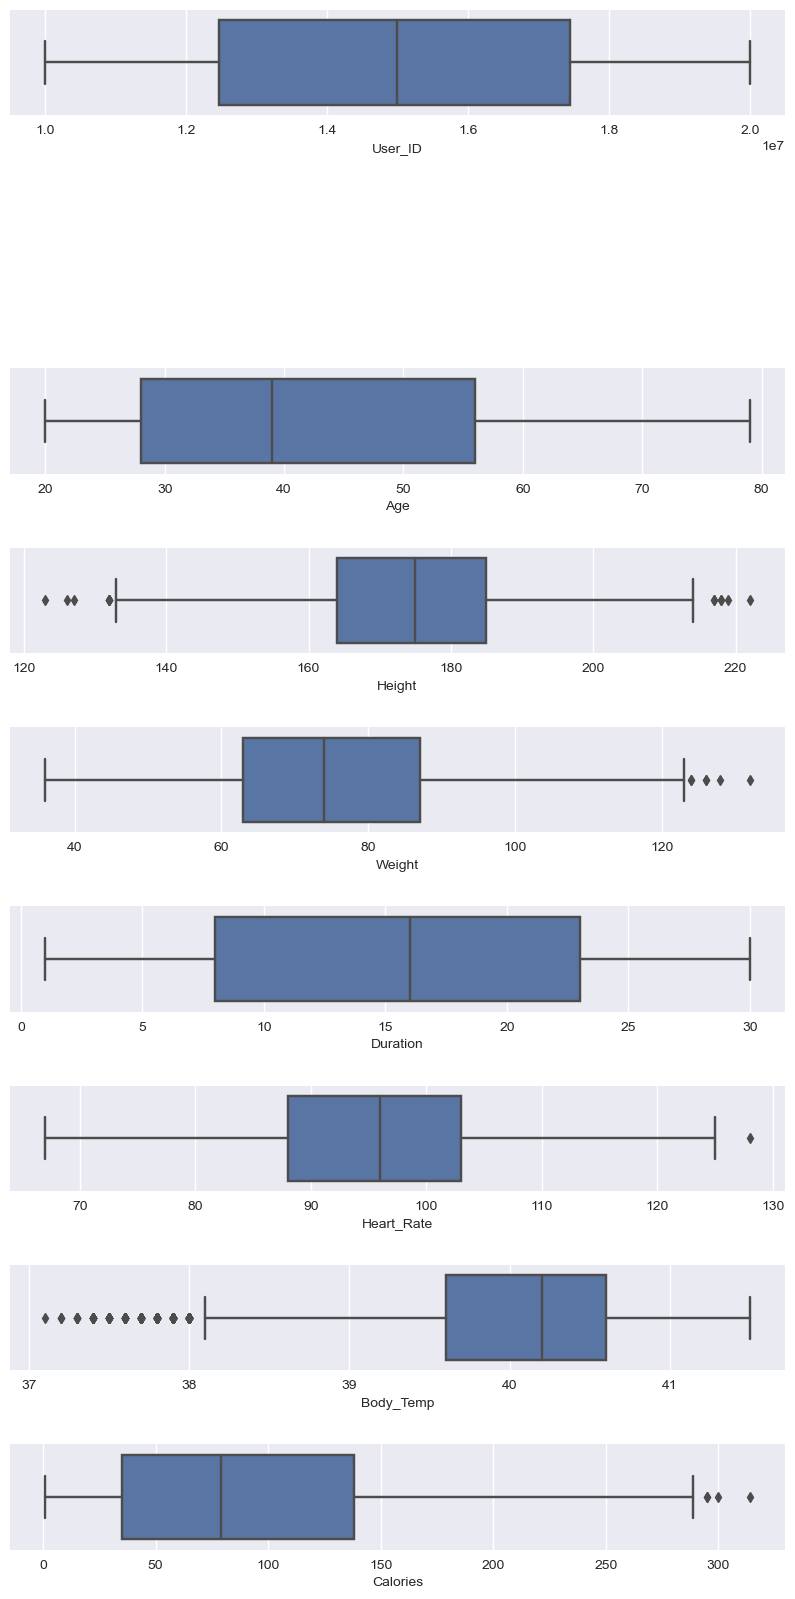

In [30]:
fig1 , axes = plt.subplots(len(e_c_data.columns) , 1 , figsize = (10 , 20))
plt.subplots_adjust(wspace = 0.3 , hspace = 0.7)
axes = axes.flatten()             
for i , column in zip(range(len(e_c_data.columns)) , e_c_data.columns):
  try:
    sns.boxplot(data = e_c_data , x = column , ax = axes[i])
  except:
    fig1.delaxes(axes[i])
    continue

### Drop Duplicates
Lets assure that this dataset does not contain any duplicate values in `User_ID` column.

In [31]:
print("The shape of dataset before dropping duplicates : " , e_c_data.shape)
e_c_data.drop_duplicates(subset = ['User_ID'], keep='last' , inplace = True)   
print("The shape of dataset after dropping duplicates : " , e_c_data.shape)

The shape of dataset before dropping duplicates :  (15000, 9)
The shape of dataset after dropping duplicates :  (15000, 9)


In the next step we have to delete User_ID feature.Because it is a low predictive feature

In [32]:
e_c_data.drop(columns = "User_ID" , inplace = True)

In [33]:
e_c_train_data , e_c_test_data = train_test_split(e_c_data , test_size = 0.3 , random_state = 1)
print("Shape of training data : " , e_c_train_data.shape)
print("Shape of test data : " , e_c_test_data.shape)

Shape of training data :  (10500, 8)
Shape of test data :  (4500, 8)


### Exploratory Data Analysis(EDA)

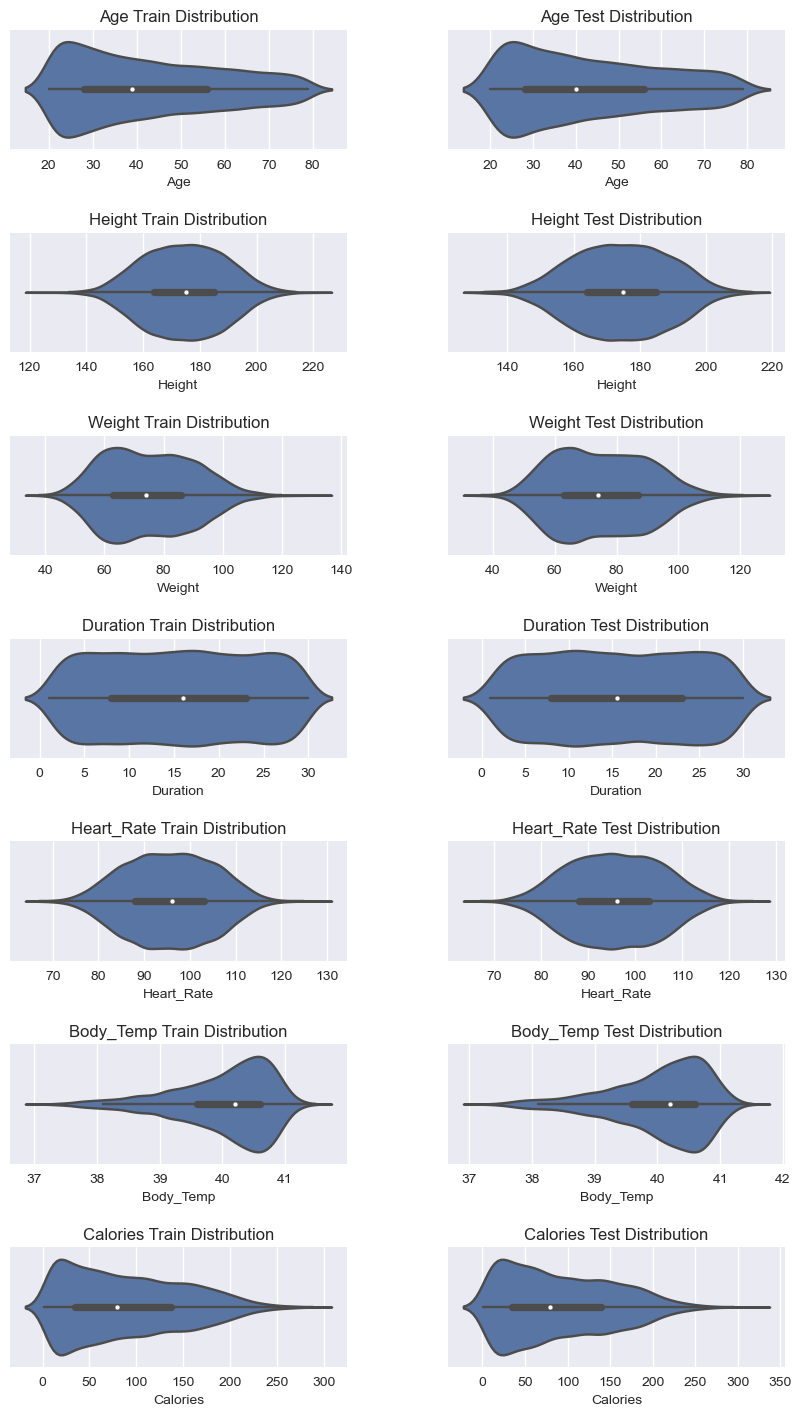

In [34]:
fig1, axes = plt.subplots(len(e_c_train_data.columns), 2, figsize=(10, 20))
plt.subplots_adjust(wspace=0.3, hspace=0.7)
axes = axes.flatten()

for i, column in zip(range(0, len(e_c_train_data.columns) * 2, 2), e_c_train_data.columns):
    try:
        axes[i].title.set_text(column + " Train Distribution")
        sns.violinplot(data=e_c_train_data, x=column, ax=axes[i])
    except:
        fig1.delaxes(axes[i])
        continue

for i, column in zip(range(1, len(e_c_train_data.columns) * 2, 2), e_c_train_data.columns):
    try:
        axes[i].title.set_text(column + " Test Distribution")
        sns.violinplot(data=e_c_test_data, x=column, ax=axes[i])
    except:
        fig1.delaxes(axes[i])
        continue

plt.show()


The distributions of features for training and test sets are pretty similar

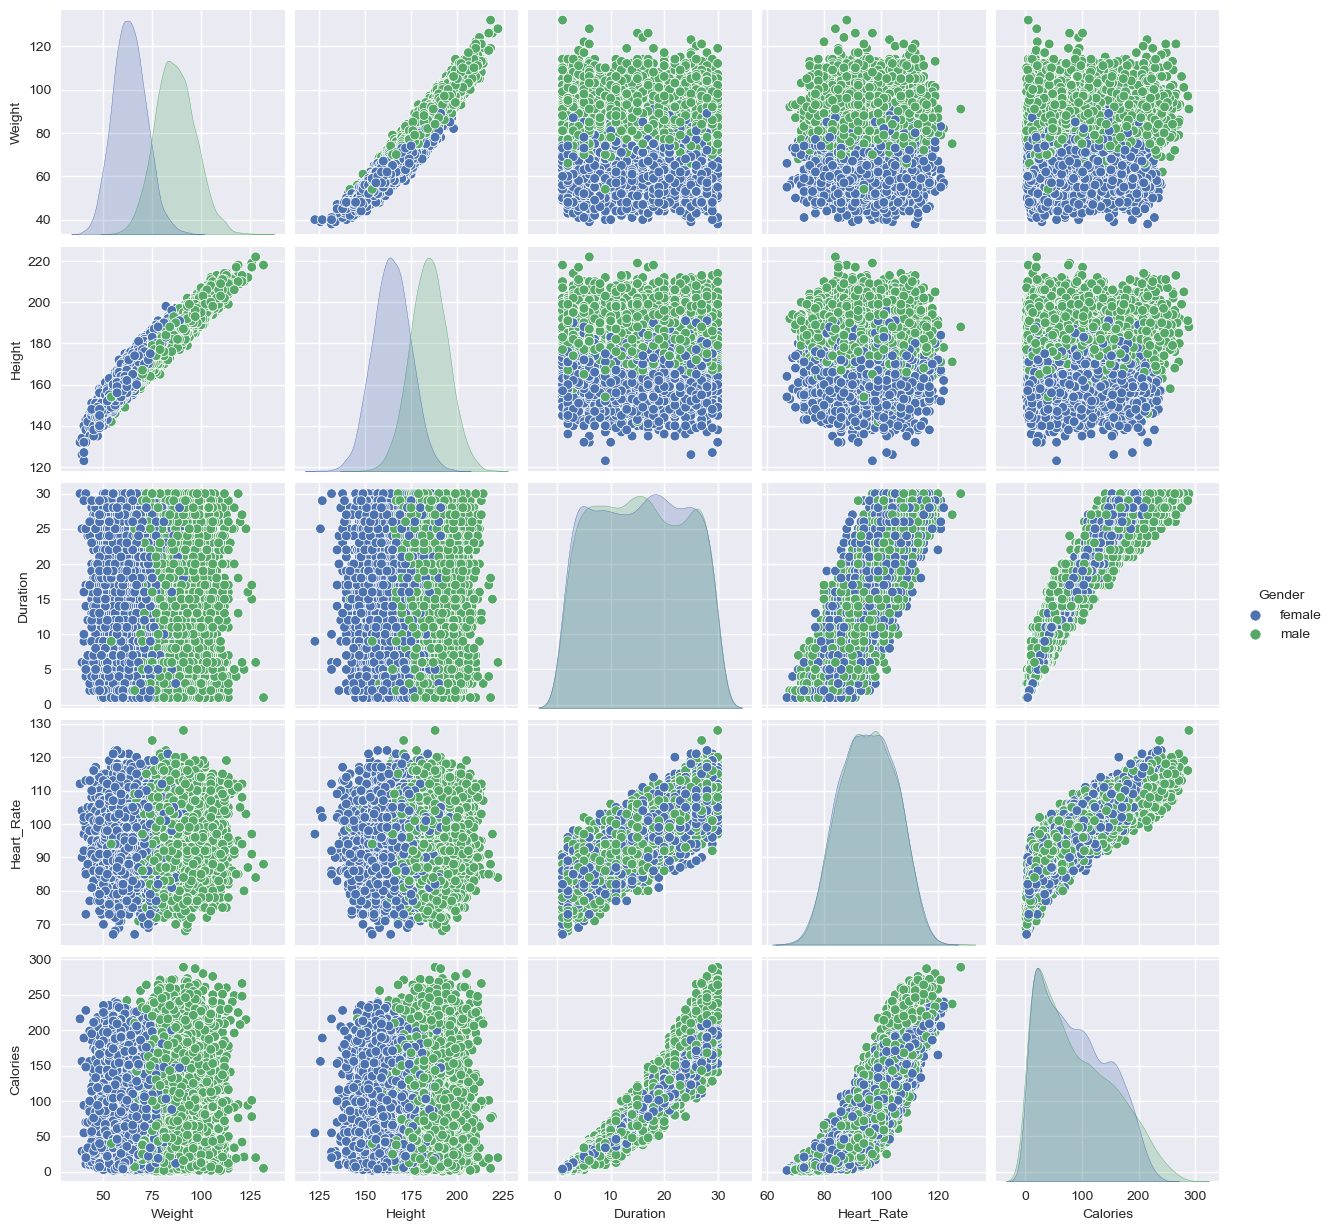

In [35]:
sns.pairplot(e_c_train_data[["Weight" , "Height" , "Duration" , "Heart_Rate" , "Calories" , "Gender"]] , hue = "Gender")

In [36]:
print('Minimum age in dataset is : ' , e_c_train_data["Age"].min())
print('Maximum age in dataset is : ' , e_c_train_data["Age"].max())

Minimum age in dataset is :  20
Maximum age in dataset is :  79


In [37]:
age_groups = ["Young" , "Middle-Aged" , "Old"]
e_c_train_data["age_groups"] = pd.cut(e_c_train_data["Age"] , bins = [20 , 40 ,60 , 80] , right = False , labels = age_groups)


In [38]:
e_c_train_data["age_groups"].value_counts()

Young          5271
Middle-Aged    3093
Old            2136
Name: age_groups, dtype: int64

In [39]:
fig = px.box(e_c_train_data , x= "age_groups" , y = "Calories" , color = "Gender")

fig.update_layout(      
    width=700,
    height=450,
)

fig.show()

* Old individuals have burned more kilocalories in compare of two other age groups.
* Young individuals are the least in burning kilocalories.

* Females in all age ranges burnt same amount of kilocalories in average.
* Old males have performed very well and young males have burnt the least kilocalories.

* Also there is an outlier for young group which is shown by a point.

In [40]:
fig = px.box(e_c_train_data , x= "age_groups" , y = "Duration" , color = "Gender")

fig.update_layout(      
    width=750,
    height=450,
)

fig.show()

* The exercise duration of each group is pretty identical.
* The median exercise duration of this dataset is about 15 minutes

In [41]:
fig = px.box(e_c_train_data , x= "age_groups" , y = "Heart_Rate" , color = "Gender")

fig.update_layout(      
    width=750,
    height=450,
)

fig.show()

* The heart rate of each group is pretty identical.
* The median heart rate of this dataset is about 95 beats per minute.

We combine "Weight" and "Height" column into "BMI".

In [42]:
for data in [e_c_train_data , e_c_test_data]:         # adding BMI column to both training and test sets
  data["BMI"] = data["Weight"] / ((data["Height"] / 100) ** 2)
  data["BMI"] = round(data["BMI"] , 2)

In [43]:
bmi_category = ["Very severely underweight" , "Severely underweight" ,
                "Underweight" , "Normal" ,
                "Overweight" , "Obese Class I" ,
                "Obese Class II" , "Obese Class III"]

e_c_train_data["Categorized_BMI"] = pd.cut(e_c_train_data["BMI"] , bins = [0 , 15 , 16 , 18.5 , 25 , 30 , 35 , 40 , 50]
                                              , right = False , labels = bmi_category)



In [44]:
e_c_train_data["Categorized_BMI"] = e_c_train_data["Categorized_BMI"].astype("object") # converting 'categorical' dtype intp 'object' dtype for "Categorized_BMI" column

In [45]:
np.unique(e_c_train_data["Categorized_BMI"])

array(['Normal', 'Overweight'], dtype=object)

<Axes: xlabel='Categorized_BMI', ylabel='count'>

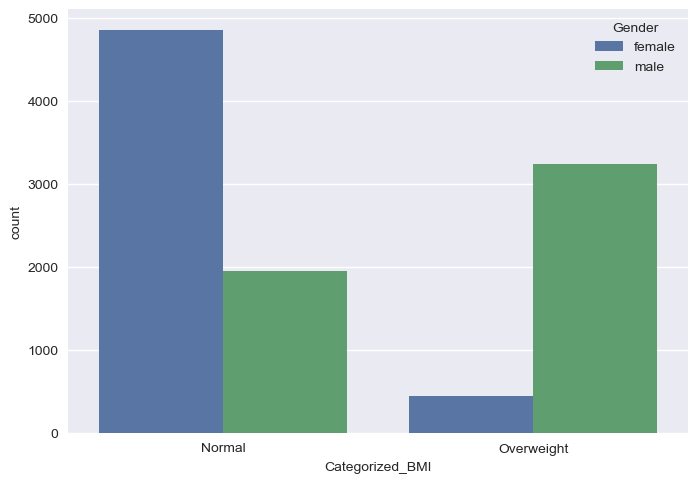

In [46]:
sns.countplot(data = e_c_train_data , x = "Categorized_BMI",hue="Gender")

* More females are normal weighted according to BMI Categories.
* More males are overweight according to BMI Categories.

<Axes: xlabel='Categorized_BMI', ylabel='count'>

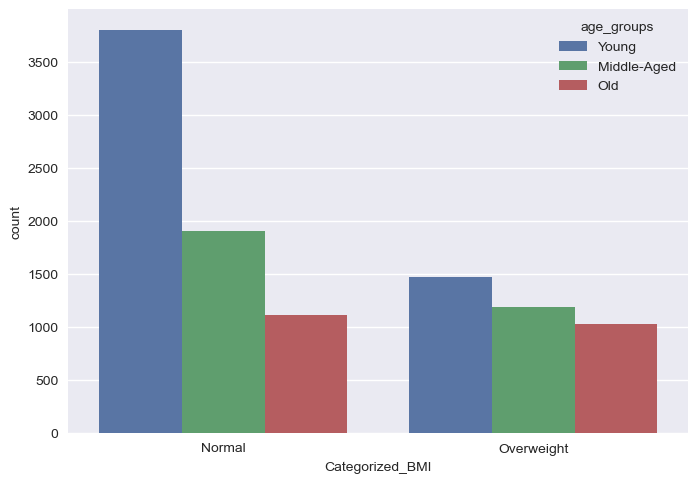

In [47]:
sns.countplot(data = e_c_train_data , x = "Categorized_BMI",hue="age_groups")

In [48]:
fig = px.box(e_c_train_data , x= "age_groups" , y = "Calories" , color = "Categorized_BMI")

fig.update_layout(      
    width=700,
    height=450,
)

fig.show()

* For all age groups, the calorie burnt distribution is similar between the Normal and Overweight BMI categories.
* There is no significant deviation or trend in calorie burnt as the age increases, suggesting that calorie burnt remains relatively stable across different age groups regardless of BMI category.
* There is one significant outlier in the Young age group for the Overweight BMI category, indicating a much higher calorie burnt than the rest of the data points.

In [49]:
fig = px.box(e_c_train_data , x= "age_groups" , y = "Duration" , color = "Categorized_BMI")

fig.update_layout(      
    width=700,
    height=450,
)

fig.show()

* For each age group, the median duration is similar for both Normal and Overweight BMI categories. 
* This indicates that age does not significantly alter the relationship between BMI category and duration.

<Axes: >

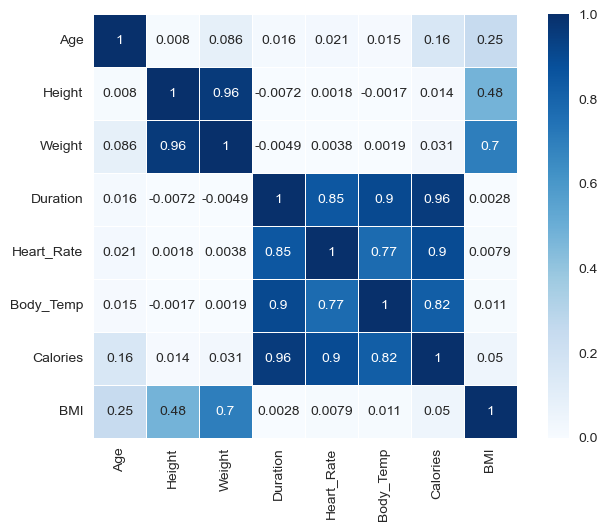

In [50]:
corr = e_c_train_data.corr()
sns.heatmap(corr , annot = True , square = True , linewidth = .5 , vmin = 0 , vmax = 1 , cmap = 'Blues')

* This heatmap shows the correlation of both features in each cell.
* If two or more features have a high correlation with each other, we have to save one of them and drop the rest.
* According to the heatmap, `Weight` and `Height` have a high correlation but we combined them and put them into the `BMI` column.So we can drop `Weight` and `Height` columns and save `BMI`.


### Training and Testing dataset

In [51]:
e_c_train_data = e_c_train_data[["Gender" , "Age" , "BMI" , "Duration" , "Heart_Rate" , "Body_Temp" , "Calories"]]
e_c_test_data = e_c_test_data[["Gender" , "Age" , "BMI"  , "Duration" , "Heart_Rate" , "Body_Temp" , "Calories"]]
e_c_train_data = pd.get_dummies(e_c_train_data, drop_first = True)
e_c_test_data = pd.get_dummies(e_c_test_data, drop_first = True)

In [52]:
X_train = e_c_train_data.drop("Calories" , axis = 1)
y_train = e_c_train_data["Calories"]

X_test = e_c_test_data.drop("Calories" , axis = 1)
y_test = e_c_test_data["Calories"]


In [53]:
e_c_test_data

Age    BMI  Duration  Heart_Rate  Body_Temp  Calories  Gender_male
7576    74  24.98      29.0       106.0       41.0     198.0            0
10509   43  26.88      13.0        97.0       39.9      72.0            1
4253    43  23.74      29.0       108.0       40.5     195.0            0
5150    62  25.36       4.0        83.0       38.9      17.0            1
506     37  22.39      15.0        94.0       40.0      74.0            0
...    ...    ...       ...         ...        ...       ...          ...
5682    38  23.23      12.0        89.0       39.8      53.0            0
11109   29  23.78      10.0        89.0       39.7      42.0            0
7443    77  23.24      30.0       110.0       41.0     218.0            0
10077   32  24.48       6.0        85.0       39.5      19.0            1
13653   41  23.41      10.0        95.0       39.3      49.0            0

[4500 rows x 7 columns]

In [54]:
e_c_train_data

Age    BMI  Duration  Heart_Rate  Body_Temp  Calories  Gender_male
4834    20  23.74       5.0        82.0       39.4      17.0            0
12171   53  24.69      19.0        99.0       40.7     110.0            0
3502    36  23.11      23.0       104.0       40.9     137.0            0
11546   70  24.03       4.0        81.0       38.7      17.0            0
6950    63  24.12      16.0        90.0       40.2      85.0            1
...    ...    ...       ...         ...        ...       ...          ...
905     25  23.62      19.0        99.0       40.6     101.0            0
5192    24  26.02       6.0        84.0       39.0      16.0            1
12172   52  23.74      15.0        99.0       39.9      94.0            1
235     70  24.16       9.0        79.0       40.0      34.0            0
13349   30  23.42      11.0        87.0       39.8      46.0            0

[10500 rows x 7 columns]

## Modelling

In [55]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [107]:
ridge_reg = Ridge(alpha=100.0)
ridge_reg.fit(X_train, y_train)
y_pred_ridge = ridge_reg.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

r2score = r2_score(y_test, y_pred_ridge)
rms = sqrt(mean_squared_error(y_test, y_pred_ridge))   
k_folds = KFold(n_splits=5, shuffle=True, random_state=1)
scores = cross_val_score(ridge_reg, X_train_scaled, np.ravel(y_train), cv=k_folds)

print("R2 score:", r2score)
print("Root Mean Squared Error:", rms)
print("Cross-Validation Scores:", scores)
print("Average CV Score:", scores.mean())



R2 score: 0.9660852647943209
Root Mean Squared Error: 11.628966596852026
Cross-Validation Scores: [0.96689859 0.96411002 0.96647623 0.96717623 0.96635377]
Average CV Score: 0.9662029676853041


In [109]:
lasso_reg = Lasso(alpha=100.0)
lasso_reg.fit(X_train, y_train)
y_pred_lasso = lasso_reg.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_lasso)

r2score = r2_score(y_test, y_pred_lasso)
rms = sqrt(mean_squared_error(y_test, y_pred_lasso))   
k_folds = KFold(n_splits=10, shuffle=True, random_state=1)
scores = cross_val_score(lasso_reg, X_train_scaled, np.ravel(y_train), cv=k_folds)

print("R2 score:", r2score)
print("Root Mean Squared Error:", rms)
print("Cross-Validation Scores:", scores)
print("Average CV Score:", scores.mean())

R2 score: 0.9086135947684288
Root Mean Squared Error: 19.089198978386552
Cross-Validation Scores: [-1.06081864e-03 -4.72381824e-04 -7.90373655e-04 -1.83970504e-05
 -5.97173122e-04 -2.12997146e-04 -1.36177216e-04 -1.54867000e-04
 -2.94173884e-05 -5.58411970e-04]
Average CV Score: -0.00040310150162516936


In [112]:
X_train_full, X_val, y_train_full, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)
xg_reg = xgb.XGBRegressor(
    objective='reg:squarederror',
    colsample_bytree=0.05,  
    learning_rate=1.0,     
    max_depth=1,           
    alpha=100,             
    reg_lambda=100,        
    n_estimators=10,       
    random_state=42
)

param_grid = {
    'max_depth': [1, 2],
    'learning_rate': [1.0, 2.0],
    'n_estimators': [5, 10],
    'alpha': [100, 200],
    'reg_lambda': [100, 200]
}


grid_search = GridSearchCV(estimator=xg_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_search.fit(X_train_full, y_train_full, eval_set=[(X_val, y_val)], early_stopping_rounds=5, verbose=False)


best_xg_reg = grid_search.best_estimator_
best_xg_reg.fit(X_train_full, y_train_full, eval_set=[(X_val, y_val)], early_stopping_rounds=5, verbose=False)

y_pred_best = best_xg_reg.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
r2score = r2_score(y_test, y_pred_best)
rms = sqrt(mean_squared_error(y_test, y_pred_best))

k_folds = KFold(n_splits=10, shuffle=True, random_state=1)
scores = cross_val_score(best_xg_reg, X_train_full, np.ravel(y_train_full), cv=k_folds)

print("R2 score:", r2score)
print("Root Mean Squared Error:", rms)
print("Cross-Validation Scores:", scores)
print("Average CV Score:", scores.mean())



R2 score: 0.9427324421840406
Root Mean Squared Error: 15.11127952832476
Cross-Validation Scores: [0.93794853 0.94157441 0.94741936 0.94484043 0.95033928 0.94366234
 0.94529843 0.94521359 0.94929933 0.9425278 ]
Average CV Score: 0.9448123481639634


In [111]:
rf = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [20],  
    'max_depth': [4],      
    'min_samples_split': [50],  
    'min_samples_leaf': [10],    
    'max_features': [1]    
}


grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2score = r2_score(y_test, y_pred)
rms = sqrt(mse)

k_folds = KFold(n_splits=10, shuffle=True, random_state=1)
scores = cross_val_score(best_rf, X_train, y_train, cv=k_folds)

print("R2 score:", r2score)
print("Root Mean Squared Error:", rms)
print("Cross-Validation Scores:", scores)
print("Average CV Score:", scores.mean())

R2 score: 0.9143447708216476
Root Mean Squared Error: 18.480931123302923
Cross-Validation Scores: [0.92389925 0.92116736 0.91280713 0.91236814 0.90865187 0.92761601
 0.92306125 0.91749619 0.9181323  0.91223117]
Average CV Score: 0.9177430662833297
